In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Note that only car_names are object data_type

but horse power should be numerical as most of them are numbers.

follow the link and we'll find that there is a '?' as the entry in horsepower column

so how to deal with that??

In [25]:
#1 CONVERT the object_dattatype to int/float data type to find the mean/median.
#REPLCAE '?' to null values
df['horsepower']=df['horsepower'].replace("?",np.nan)

In [24]:
#Convert horsepower column  to float type (bcoz to calculate mean/median we need numrical datatype)
df['horsepower']=df['horsepower'].astype(float)

In [27]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

HORSEPOWER converted to float_datatype

In [30]:
df.isnull().sum()  

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [28]:
median1=df["horsepower"].median()
median1

93.5

In [29]:
df["horsepower"].replace(np.nan,median1,inplace=True)

no missing values

- DUPlicates

In [32]:
df.duplicated().sum()
#NO DUPLICATES PRESENT

#df.drop_duplicates(inplace=True) --IN CASE Duplicates would have been present

0

--no duplicates in the data

In [34]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

-- Outliers

<Axes: >

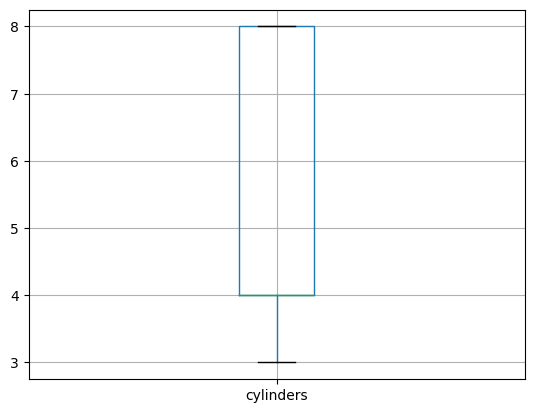

In [36]:
df.boxplot(column=["cylinders"])

<Axes: >

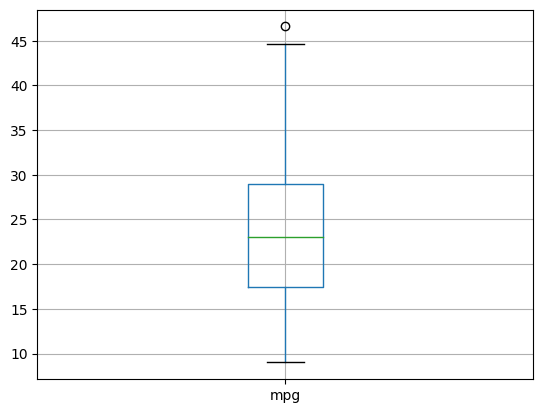

In [37]:
df.boxplot(column=["mpg"])

<Axes: >

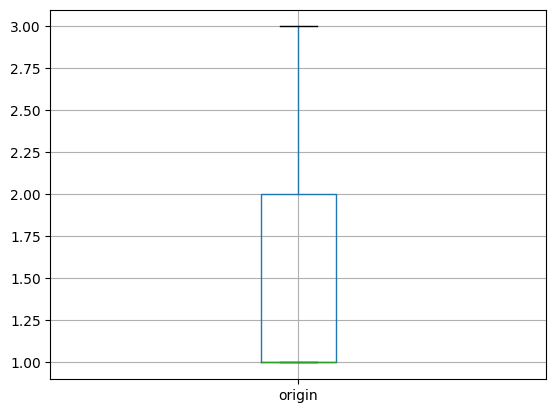

In [38]:
df.boxplot(column=["origin"])

<Axes: >

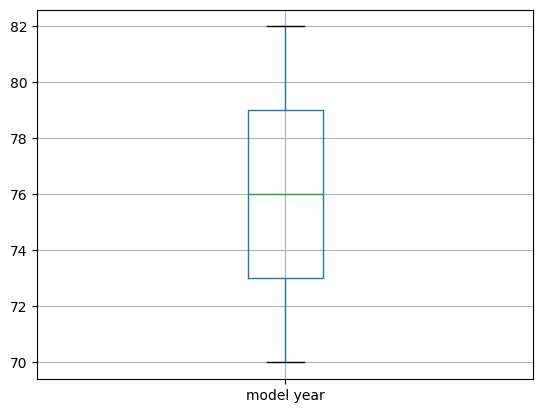

In [39]:
df.boxplot(column=["model year"])

<Axes: >

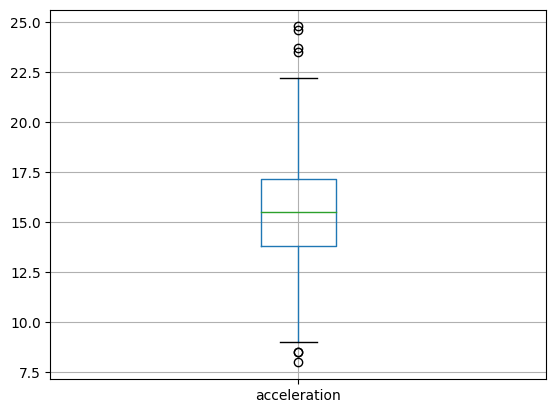

In [40]:
df.boxplot(column=["acceleration"])

In [44]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

In [50]:
low_acc,high_acc=remove_outlier(df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]>high_acc,high_acc,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<low_acc,low_acc,df["acceleration"])


<Axes: >

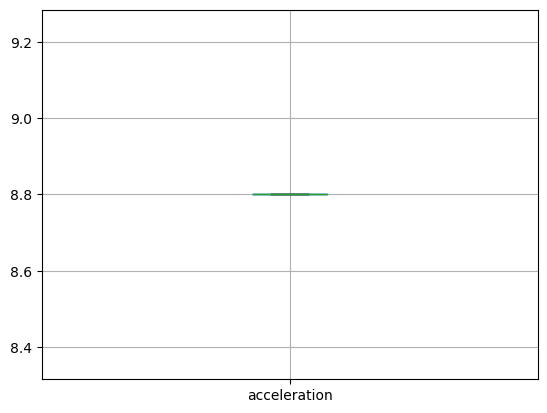

In [51]:
df.boxplot(column=["acceleration"])
#with no outliers

<Axes: >

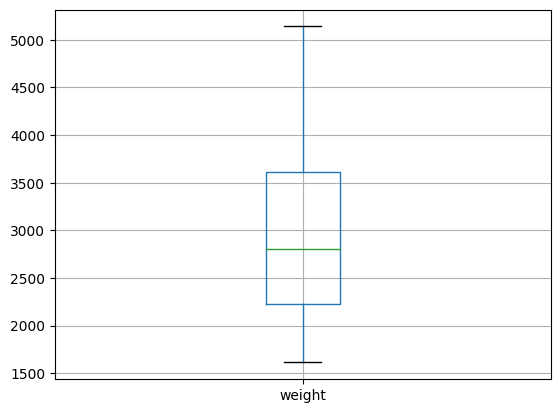

In [48]:
df.boxplot(column=["weight"])

<Axes: >

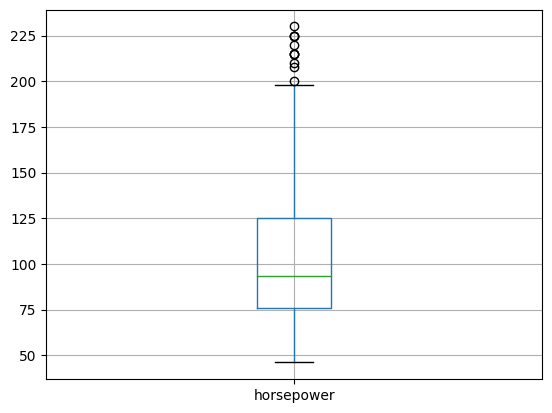

In [49]:
df.boxplot(column=["horsepower"])

In [52]:
low_hp,high_hp=remove_outlier(df["horsepower"])
df["horsepower"]=np.where(df["horsepower"]>high_hp,high_hp,df["horsepower"])
df["horsepower"]=np.where(df["horsepower"]<low_hp,low_hp,df["horsepower"])


<Axes: >

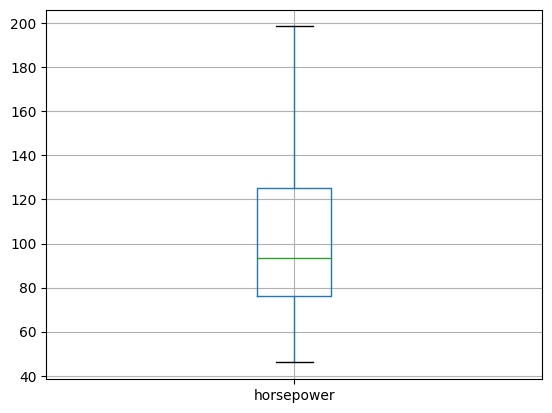

In [53]:
df.boxplot(column=["horsepower"])
#with no outliers

<Axes: >

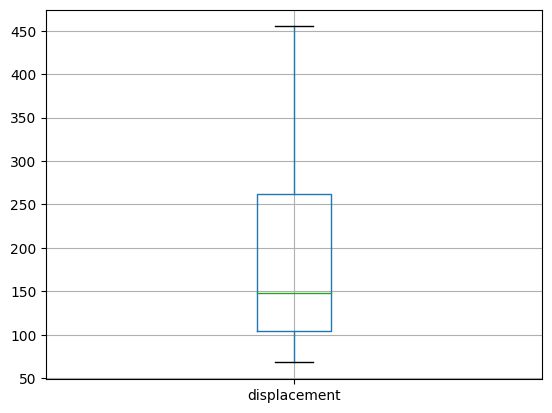

In [54]:
df.boxplot(column=["displacement"])

ALL outliers have been removed

-ENCODING

In [55]:
dummies=pd.get_dummies(df[["car name"]])
dummies

,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,car name_amc concord,car name_amc concord d/l,car name_amc concord dl,car name_amc concord dl 6,car name_amc gremlin,car name_amc hornet,car name_amc hornet sportabout (sw),...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#CONCATENATING THE Dummies column with df
df=pd.concat([df,dummies],axis=1)

In [57]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car name_amc ambassador brougham,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,8.8,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,8.8,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,8.8,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,8.8,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,8.8,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,8.8,82,1,ford mustang gl,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,8.8,82,2,vw pickup,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295,8.8,82,1,dodge rampage,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,8.8,82,1,ford ranger,0,...,0,0,0,0,0,0,0,0,0,0


note we have to drop the car name that is not encoded

In [59]:
column_not_encoded=["car name"]
df.drop(column_not_encoded,axis=1,inplace=True)

In [60]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,8.8,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,8.8,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,8.8,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,8.8,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,8.8,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,8.8,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,8.8,82,2,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295,8.8,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,8.8,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 313 entries, mpg to car name_vw rabbit custom
dtypes: float64(4), int64(4), uint8(305)
memory usage: 143.5 KB


WE have no OBJECT data type!! 
successfully ENCODED